# Introduction

The goal for this project is to identify which of the following classification algorithms can best predict the likelihood that an online shopper makes a purchase: (1) Random Forest Classifier, (2) Support Vector Machine, (3) K Nearest Neighbors, or (4) Logistic Regression. I use the f1 score as a metric to compare the above algorithms.  

I use time series data set on shoppers' behavior. The data set spans 10 months and includes 18 variables, including the target variable: Revenue. 

This analysis takes the following structure: 

    1. Data visualization.
    2. Feature Engineering.
    3. Cross Validation.
    4. Conclusion. 
    
I find that the Random Forest Classifier has the highest f1 score.


In [ ]:
# Import Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("online_shoppers_intention.csv")
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


# Data Visualization

In [ ]:
print("This data set has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

This data set has 12330 rows and 18 columns.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

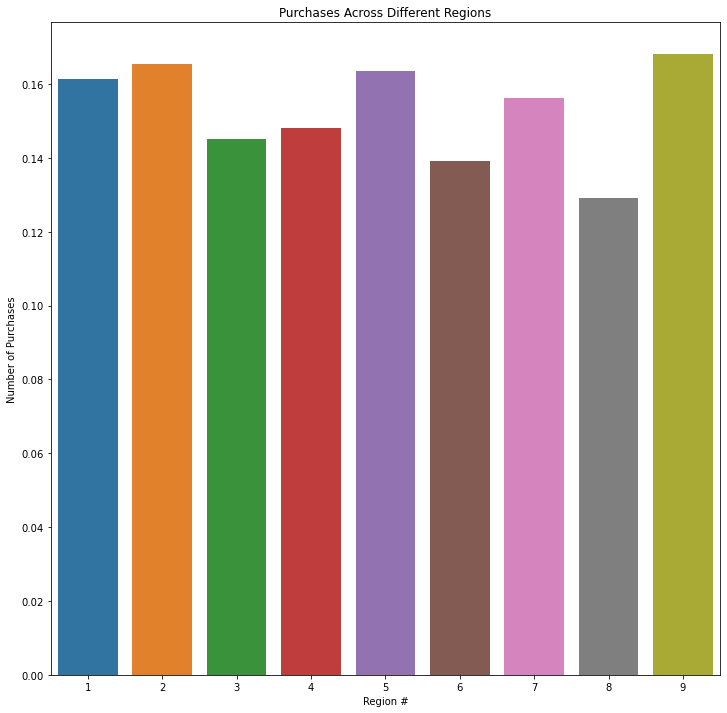

In [ ]:
# More than 16% of users who came from Regions 1, 2, 5, and 9 also completed a purchase.
plt.figure(figsize = (12, 12))
sns.barplot(df.groupby(by = 'Region').mean().index, df.groupby(by = 'Region').mean().Revenue)
plt.title("Purchases Across Different Regions")
plt.xlabel("Region #")
plt.ylabel("Number of Purchases")
plt.show()

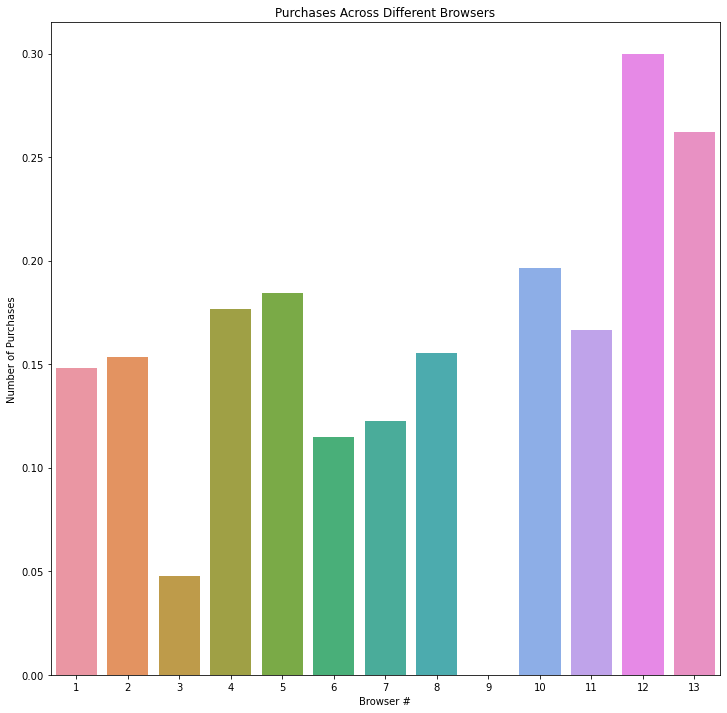

In [ ]:
# 30% of users who use Browser #12 also completed a purchase. 
plt.figure(figsize = (12, 12))
sns.barplot(df.groupby(by = 'Browser').mean().index, df.groupby(by = 'Browser').mean().Revenue)
plt.title("Purchases Across Different Browsers")
plt.xlabel("Browser #")
plt.ylabel("Number of Purchases")
plt.show()

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


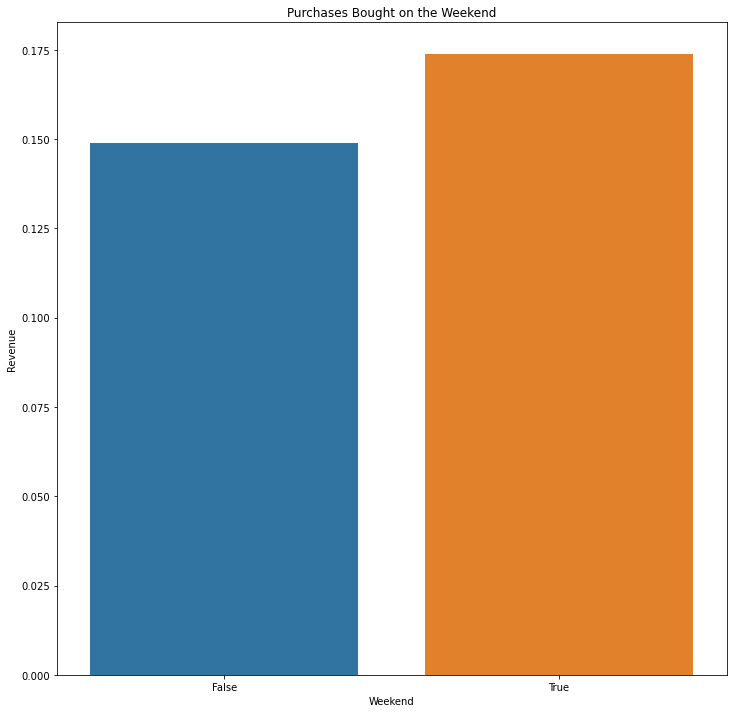

In [ ]:
# Users who visited the site on the Weekend were more likely to complete a purchase than users who visited the site 
# on a weekday. 

plt.figure(figsize = (12, 12))
sns.barplot(df.groupby(by = 'Weekend').mean().index, df.groupby(by = 'Weekend').mean().Revenue)
plt.title("Purchases Bought on the Weekend")
plt.show()

# Feature Engineering

In [ ]:
# Is there a difference between users who spend more time browsing product-related pages than the 'typical user'?

# Similarly, is there a difference between users who browse more product-related pages than the 'typical user'?

print(df['ProductRelated'].describe())
print("=========================")
print(df['ProductRelated_Duration'].describe())

count    12330.000000
mean        31.731468
std         44.475503
min          0.000000
25%          7.000000
50%         18.000000
75%         38.000000
max        705.000000
Name: ProductRelated, dtype: float64
count    12330.000000
mean      1194.746220
std       1913.669288
min          0.000000
25%        184.137500
50%        598.936905
75%       1464.157213
max      63973.522230
Name: ProductRelated_Duration, dtype: float64


In [ ]:
# more_views: binary variable that is 1 if a person browses more product-related pages than average, and 0 otherwise
# more_time: binary variable that is 1 if a person takes more time browsing product-related pages than average, and 0 otherwise.

more_views = [1 if df['ProductRelated'][i] > df['ProductRelated'].mean() else 0 for i in range(len(df))]
more_time = [1 if df['ProductRelated_Duration'][i] > df['ProductRelated_Duration'].mean() else 0 for i in range(len(df))]
df['ProductRelated_Greater'] = more_views
df['ProductRelated_DurationGreater'] = more_time
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,ProductRelated_Greater,ProductRelated_DurationGreater
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0,0


In [ ]:
# super_fan: 1 if more_views == 1 and if more_time == 1 

super_fan = [1 if (more_views[i] == 1 and more_time[i] == 1)  else 0 for i in range(len(df))]
df['SuperFan'] = super_fan
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,ProductRelated_Greater,ProductRelated_DurationGreater,SuperFan
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,1,1,1,Returning_Visitor,False,False,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,2,2,1,2,Returning_Visitor,False,False,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,4,1,9,3,Returning_Visitor,False,False,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,3,2,2,4,Returning_Visitor,False,False,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,3,3,1,4,Returning_Visitor,True,False,0,0,0


In [ ]:
print("The percentage of people who view more product-related pages than is typical: {}% ".format(np.round(df.ProductRelated_Greater.sum()/len(df), 4) * 100))
print("The percentage of people who view product-related pages longer than is typical: {}%".format(np.round(df.ProductRelated_DurationGreater.sum()/len(df), 4) * 100))
print("The percentage of people who are super fans: {}% ".format(np.round(df.SuperFan.sum()/len(df), 4) * 100))

The percentage of people who view more product-related pages than is typical: 30.64% 
The percentage of people who view product-related pages longer than is typical: 30.81%
The percentage of people who are super fans: 23.59% 


In [ ]:
# Of those who are 'Super Fans', 24.48% bought a product. 
# This is nearly twice the percentage of non-Super Fans who bought a product

df.groupby(by = 'SuperFan').mean()['Revenue']

SuperFan
0    0.126950
1    0.244758
Name: Revenue, dtype: float64

In [ ]:
# People who browsed more pages than average were more likely to purchase a product.

df.groupby(by = 'ProductRelated_Greater').mean()['Revenue']

ProductRelated_Greater
0    0.121609
1    0.229751
Name: Revenue, dtype: float64

In [ ]:
# People who browsed these sites longer than average were more likely to purchase a product.
df.groupby(by = 'ProductRelated_DurationGreater').mean()['Revenue']

ProductRelated_DurationGreater
0    0.118743
1    0.235588
Name: Revenue, dtype: float64

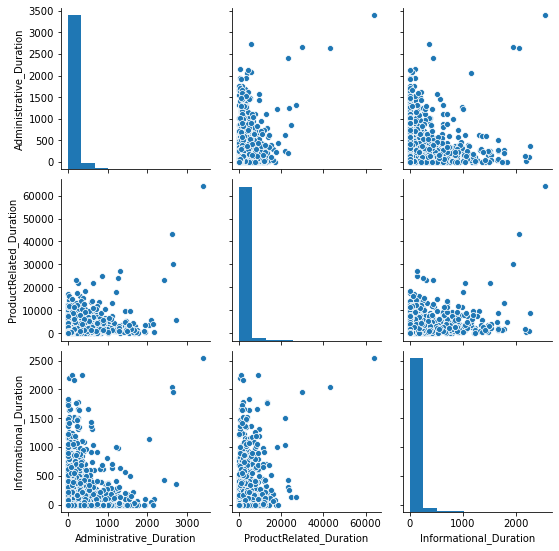

In [ ]:
# There is not a clear relationship between the amount of time spent on one page type and product-related pages.
sns.pairplot(df[['Administrative_Duration', 'ProductRelated_Duration', 'Informational_Duration']])

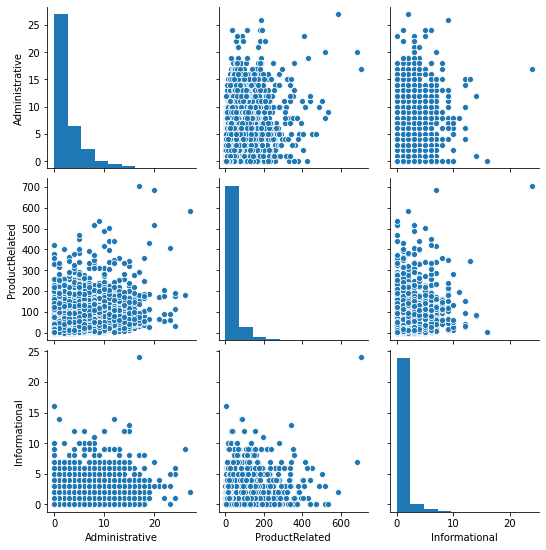

In [ ]:
# There is also no clear relationship between the number of pages of one page type and product-related pages. 

sns.pairplot(df[['Administrative', 'ProductRelated', 'Informational']])

# Cross Validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# One-Hot Encoding

region = pd.get_dummies(df.Region, prefix = "Region") 
traffic = pd.get_dummies(df.TrafficType, prefix = "TrafficType")
month = pd.get_dummies(df['Month'])
visitortype = pd.get_dummies(df['VisitorType'])
df = pd.concat([df, month], axis = 1)
df = pd.concat([df, region, traffic, month, visitortype], axis = 1)
df['Purchase'] = pd.get_dummies(df.Revenue)[1]
df['Weekend'] = pd.get_dummies(df.Weekend)[1]
df = df.drop(['Revenue', 'Month', 'VisitorType'], axis = 1)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,June,Mar,May,Nov,Oct,Sep,New_Visitor,Other,Returning_Visitor,Purchase
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df[['ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'ProductRelated_Greater',
       'ProductRelated_DurationGreater', 'SuperFan', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'TrafficType_1',
       'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5',
       'TrafficType_6', 'TrafficType_7', 'TrafficType_8', 'TrafficType_9',
       'TrafficType_10', 'TrafficType_11', 'TrafficType_12', 'TrafficType_13',
       'TrafficType_14', 'TrafficType_15', 'TrafficType_16', 'TrafficType_17',
       'TrafficType_18', 'TrafficType_19', 'Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct']]

y = df['Purchase']

# Normalize the training set. 
scalar = StandardScaler().fit(X)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import f1_score

In [ ]:
tscv = TimeSeriesSplit()

scores = [[], [], [], []]

for train_index, test_index in tscv.split(X):
    X_train, X_test = scalar.transform(X.loc[train_index]), scalar.transform(X.loc[test_index])
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    clf_tree = RandomForestClassifier()
    clf_svm = svm.SVC()
    clf_knn = KNeighborsClassifier()
    clf_lr = LogisticRegression(max_iter = 4000)
    
    clf_tree.fit(X_train, y_train)
    clf_svm.fit(X_train, y_train)
    clf_knn.fit(X_train, y_train)
    clf_lr.fit(X_train, y_train)
    
    ypred_tree = clf_tree.predict(X_test)
    ypred_svm = clf_svm.predict(X_test)
    ypred_knn = clf_knn.predict(X_test)
    ypred_lr = clf_lr.predict(X_test)
    
    scores[0].append(f1_score(y_test, ypred_tree))
    scores[1].append(f1_score(y_test, ypred_svm))
    scores[2].append(f1_score(y_test, ypred_knn))
    scores[3].append(f1_score(y_test, ypred_lr))
    
print("The average f1 score for the Random Forest Classifier is: ", sum(scores[0])/len(scores[0]))
print("The average f1 score for the Support Vector Machine is: ", sum(scores[1]) / len(scores[1]))
print("The average f1 score for the K Nearest Neighbors is: ", sum(scores[2]) / len(scores[2]))
print("The average f1 score for the Logistic Regression is: ", sum(scores[3]) / len(scores[3]))

The average f1 score for the Random Forest Classifier is:  0.5704059194353814
The average f1 score for the Support Vector Machine is:  0.46020157424130936
The average f1 score for the K Nearest Neighbors is:  0.32778757139886705
The average f1 score for the Logistic Regression is:  0.5199175443411771


# Conclusion

Thus, the Random Forest Classifier performs best of the four models that we test.

One way to improve the above analysis would be to code hyperparameter tuning and sequential splitting for cross validation. This would allow each model to use the parameters that maximize their f1 score, and thus, permit a more accurate comparison across the models. 

I am also aware that there may be some data leakage in the feature engineering stage because the binary variables that I create are based on the average of the entire data set, and thus, include information from all time periods. In the future, I will be careful to prevent this from occurring. 